In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install adabelief-tf==0.2.0

In [ ]:
!pip install tensorflow==2.9.1

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Set floating point precision option for pandas
pd.set_option('display.float_format', lambda x: '%.4f' % x)

# Import seaborn library and set context and style
import seaborn as sns
sns.set_context("paper", font_scale=1.3)
sns.set_style('white')

# Import warnings and set filter to ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Import time library
from time import time

# Import matplotlib ticker and scipy stats
import matplotlib.ticker as tkr
from scipy import stats

# Import statistical tools for time series analysis
from statsmodels.tsa.stattools import adfuller

# Import preprocessing from sklearn
from sklearn import preprocessing

# Import partial autocorrelation function from statsmodels
from statsmodels.tsa.stattools import pacf

# Enable inline plotting in Jupyter Notebook
%matplotlib inline

# Import math library
import math

# Import necessary functions from keras
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *

# Import MinMaxScaler from sklearn
from sklearn.preprocessing import MinMaxScaler

# Import mean squared error and mean absolute error from sklearn
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# Import early stopping from keras callbacks
from keras.callbacks import EarlyStopping

In [ ]:
#data = pd.read_csv('/content/drive/MyDrive/household_power_consumption.txt', delimiter=';')

In [ ]:


# #Ekhan theke
# sample_size = int(0.01 * len(data))  # 1% sample size
# sampled_data = data.sample(sample_size)
# sampled_data.head(5)

# data2 = sampled_data
# #Eituk


#df = pd.DataFrame(data2)
#df.to_csv('/content/drive/MyDrive/data_no_index.csv', index=False)  # Save without row index
#df.to_csv('/content/drive/MyDrive/individual+household+electric+power+consumption/data_tab_delimited.csv', sep='\t')
#df.to_csv('/content/drive/MyDrive/individual+household+electric+power+consumption/my_data.csv', mode='a', header=False)
# float_column = data["Global_active_power"]
# average = float_column.mean()
# median = float_column.median()
# minimum = float_column.min()
# maximum = float_column.max()


# grouped_data = data.groupby("Global_active_power").agg(
#     mean=("float_column", "mean"),
#     median=("float_column", "median"),
#     min=("float_column", "min"),
#     max=("float_column", "max"),
# )
# data2 = grouped_data
# data2.head()

In [ ]:
#data2.head()

In [ ]:
#print("\nInformation about the dataframe:")
#print(data.info())

In [ ]:
#data['date_time'] = pd.to_datetime(data['Date'] + ' ' + data['Time']) #this is too slow

In [ ]:
#data2['date_time'] = pd.to_datetime(data2['Date'] + ' ' + data2['Time'])

In [ ]:
# #This block of code worked and saved on my drive
# df = pd.DataFrame(data2)
# df.to_csv('/content/drive/MyDrive/eta.csv')
# df2 = pd.DataFrame(data)
# df2.to_csv('/content/drive/MyDrive/etaysob.csv')
##

 # Save without row index
#df.to_csv('/content/drive/MyDrive/individual+household+electric+power+consumption/data_tab_delimited.csv', sep='\t')
#df.to_csv('/content/drive/MyDrive/individual+household+electric+power+consumption/my_data.csv', mode='a', header=False)


In [ ]:
data2 = pd.read_csv('/content/drive/MyDrive/eta.csv')
data2 = data2.iloc[:, 1:]
data = pd.read_csv('/content/drive/MyDrive/etaysob.csv')
data = data.iloc[:, 1:]

In [ ]:
# if data2.shape == data3.shape and all(data2 == data3):
#     print("DataFrames are equal.")
# else:
#     print("DataFrames are not equal.")
# df_diff = data2.compare(data3)
# print(df_diff)
print(data2)
print(data)

            Date      Time Global_active_power Global_reactive_power  Voltage  \
0       5/5/2009  17:28:00               0.334                 0.000  242.370   
1      30/4/2009  07:14:00               1.840                 0.052  241.440   
2       3/4/2010  13:20:00               1.722                 0.280  243.960   
3      15/6/2008  14:47:00               1.598                 0.334  239.550   
4       4/5/2008  10:20:00               0.350                 0.084  239.620   
...          ...       ...                 ...                   ...      ...   
20747  21/7/2010  01:24:00               0.930                 0.232  242.340   
20748   5/1/2008  12:44:00               1.712                 0.108  237.430   
20749   9/8/2007  04:13:00               0.144                 0.000  234.390   
20750  3/12/2009  04:07:00               0.560                 0.358  243.850   
20751  16/3/2008  10:10:00               0.606                 0.180  239.140   

      Global_intensity Sub_

In [ ]:
print(data.shape)
print(data2.shape)

(2075259, 10)
(20752, 10)


In [ ]:
data['Global_active_power'] = pd.to_numeric(data['Global_active_power'], errors='coerce')
data2['Global_active_power'] = pd.to_numeric(data2['Global_active_power'], errors='coerce')
data = data.dropna(subset=['Global_active_power'])
data2 = data2.dropna(subset=['Global_active_power'])

In [ ]:
data['date_time'] = pd.to_datetime(data['date_time'])

data2['date_time'] = pd.to_datetime(data2['date_time'])

In [ ]:
11111

11111

In [ ]:
data['year'] = data['date_time'].apply(lambda x: x.year)
data['quarter'] = data['date_time'].apply(lambda x: x.quarter)
data['month'] = data['date_time'].apply(lambda x: x.month)
data['day'] = data['date_time'].apply(lambda x: x.day)

data2['year'] = data2['date_time'].apply(lambda x: x.year)
data2['quarter'] = data2['date_time'].apply(lambda x: x.quarter)
data2['month'] = data2['date_time'].apply(lambda x: x.month)
data2['day'] = data2['date_time'].apply(lambda x: x.day)

# New Section

In [ ]:
data = data.loc[:,['date_time','Global_active_power', 'year','quarter','month','day']]
data2 = data2.loc[:,['date_time','Global_active_power', 'year','quarter','month','day']]

In [ ]:
data.sort_values('date_time', inplace=True, ascending=True)
data2.sort_values('date_time', inplace=True, ascending=True)

In [ ]:
data = data.reset_index(drop=True)
data2 = data2.reset_index(drop=True)

In [ ]:
data['weekday'] = data['date_time'].apply(lambda x: x.weekday() < 5).astype(int)
data2['weekday'] = data2['date_time'].apply(lambda x: x.weekday() < 5).astype(int)

In [ ]:
print('Number of rows and columns:', data.shape)

# Print the minimum and maximum date_time values
print('Minimum date_time:', data.date_time.min())
print('Maximum date_time:', data.date_time.max())

# Display the last 5 rows of the data
data.tail(5)

Number of rows and columns: (2049280, 7)
Minimum date_time: 2006-12-16 17:24:00
Maximum date_time: 2010-12-11 23:59:00


,date_time,Global_active_power,year,quarter,month,day,weekday
2049275,2010-12-11 23:55:00,0.6900,2010,4,12,11,0
2049276,2010-12-11 23:56:00,0.6880,2010,4,12,11,0
2049277,2010-12-11 23:57:00,0.6880,2010,4,12,11,0
2049278,2010-12-11 23:58:00,0.6880,2010,4,12,11,0
2049279,2010-12-11 23:59:00,0.6880,2010,4,12,11,0


In [ ]:
import scipy.stats as stats

# Calculate the test statistics and p-value
stat, p = stats.normaltest(data.Global_active_power)

# Print the results
print('Statistics=%.3f, p=%.3f' % (stat, p))

# Set the significance level
alpha = 0.05

# Make a decision on the test result
if p > alpha:
    print('Data looks Gaussian (fail to reject H0)')
else:
    print('Data does not look Gaussian (reject H0)')

Statistics=724881.795, p=0.000
Data does not look Gaussian (reject H0)


Kurtosis of normal distribution: 4.218671866132123
Skewness of normal distribution: 1.7862320846320832


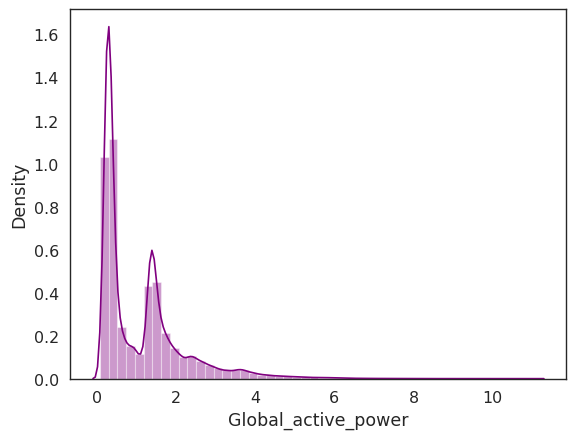

In [ ]:
sns.distplot(data.Global_active_power,color='purple')
print( 'Kurtosis of normal distribution: {}'.format(stats.kurtosis(data.Global_active_power)))
print( 'Skewness of normal distribution: {}'.format(stats.skew(data.Global_active_power)))




Kurtosis of normal distribution: 4.073979698333093
Skewness of normal distribution: 1.754403880025073


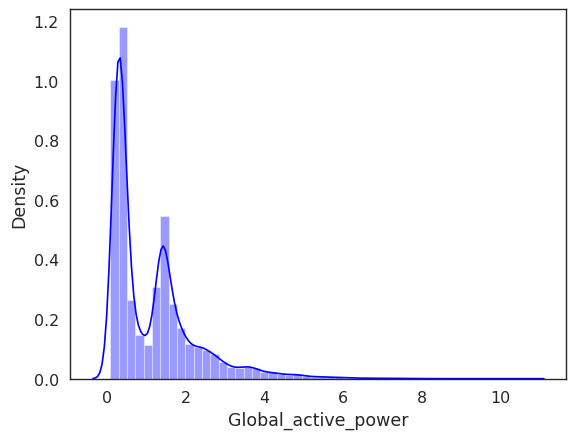

In [ ]:
sns.distplot(data2.Global_active_power,color='blue')
print( 'Kurtosis of normal distribution: {}'.format(stats.kurtosis(data2.Global_active_power)))
print( 'Skewness of normal distribution: {}'.format(stats.skew(data2.Global_active_power)))

In [ ]:
print(data2.Global_active_power)

0       3.2380
1       3.3760
2       3.4740
3       2.4440
4       2.0280
         ...  
20498   1.4200
20499   0.6940
20500   2.9900
20501   2.3180
20502   1.7520
Name: Global_active_power, Length: 20503, dtype: float64


In [ ]:
print(data.Global_active_power)

0         4.2160
1         5.3600
2         5.3740
3         5.3880
4         3.6660
           ...  
2049275   0.6900
2049276   0.6880
2049277   0.6880
2049278   0.6880
2049279   0.6880
Name: Global_active_power, Length: 2049280, dtype: float64


In [ ]:
data1 = data[(data.date_time >= '2010-07-01') & (data.date_time < '2010-7-16')]

# plt.figure(figsize=(14,6))
# plt.plot(data1.date_time, data1.Global_active_power, color='purple')
# plt.ylabel('Global Active Power (kW)', fontsize=12)
# plt.xlabel('Date', fontsize=12)
# plt.title('Active Power Consumption for a Particular Time Frame', fontsize=14)
# plt.tight_layout()
# plt.grid(True)
# sns.despine(bottom=True, left=True)
# plt.show()

In [ ]:
data1.head()

,date_time,Global_active_power,year,quarter,month,day,weekday
1839272,2010-07-01 00:00:00,0.4500,2010,3,7,1,1
1839273,2010-07-01 00:01:00,0.4260,2010,3,7,1,1
1839274,2010-07-01 00:02:00,0.3660,2010,3,7,1,1
1839275,2010-07-01 00:03:00,0.3540,2010,3,7,1,1
1839276,2010-07-01 00:04:00,0.3340,2010,3,7,1,1


In [ ]:
data3 = data2[(data2.date_time >= '2010-07-01') & (data2.date_time < '2010-7-16')]

# plt.figure(figsize=(14,6))
# plt.plot(data3.date_time, data3.Global_active_power, color='blue')
# plt.ylabel('Global Active Power (kW)', fontsize=12)
# plt.xlabel('Date', fontsize=12)
# plt.title('Active Power Consumption for a Particular Time Frame', fontsize=14)
# plt.tight_layout()
# plt.grid(True)
# sns.despine(bottom=True, left=True)
# plt.show()

In [ ]:
data3.head()

,date_time,Global_active_power,year,quarter,month,day,weekday
18466,2010-07-01 01:45:00,0.3460,2010,3,7,1,1
18467,2010-07-01 04:23:00,0.4420,2010,3,7,1,1
18468,2010-07-01 07:48:00,3.7560,2010,3,7,1,1
18469,2010-07-01 08:04:00,2.2860,2010,3,7,1,1
18470,2010-07-01 08:43:00,1.8980,2010,3,7,1,1


In [ ]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Create a figure with 2 subplots
# plt.figure(figsize=(12,5))

# # Plot the first subplot showing the violinplot of yearly global active power
# plt.subplot(1,2,1)
# # Adjust the subplot's width
# plt.subplots_adjust(wspace=0.2)
# # Create the violinplot using Seaborn's violinplot function
# sns.violinplot(x="year", y="Global_active_power", data=data, color='purple')
# # Label the x-axis
# plt.xlabel('Year', fontsize=12)
# # Add a title to the plot
# plt.title('Violin plot of Yearly Global Active Power', fontsize=14)
# # Remove the top and right spines of the plot
# sns.despine(left=True, bottom=True)
# # Add a tight layout to the plot
# plt.tight_layout()

# # Plot the second subplot showing the violinplot of quarterly global active power
# plt.subplot(1,2,2)
# # Create the violinplot using Seaborn's violinplot function
# sns.violinplot(x="quarter", y="Global_active_power", data=data, color='purple')
# # Label the x-axis
# plt.xlabel('Quarter', fontsize=12)
# # Add a title to the plot
# plt.title('Violin plot of Quarterly Global Active Power', fontsize=14)
# # Remove the top and right spines of the plot
# sns.despine(left=True, bottom=True)
# # Add a tight layout to the plot
# plt.tight_layout()

In [ ]:
# plt.figure(figsize=(12,5))

# # Plot the first subplot showing the violinplot of yearly global active power
# plt.subplot(1,2,1)
# # Adjust the subplot's width
# plt.subplots_adjust(wspace=0.2)
# # Create the violinplot using Seaborn's violinplot function
# sns.violinplot(x="year", y="Global_active_power", data=data2, color='blue')
# # Label the x-axis
# plt.xlabel('Year', fontsize=12)
# # Add a title to the plot
# plt.title('Violin plot of Yearly Global Active Power', fontsize=14)
# # Remove the top and right spines of the plot
# sns.despine(left=True, bottom=True)
# # Add a tight layout to the plot
# plt.tight_layout()

# # Plot the second subplot showing the violinplot of quarterly global active power
# plt.subplot(1,2,2)
# # Create the violinplot using Seaborn's violinplot function
# sns.violinplot(x="quarter", y="Global_active_power", data=data2, color='blue')
# # Label the x-axis
# plt.xlabel('Quarter', fontsize=12)
# # Add a title to the plot
# plt.title('Violin plot of Quarterly Global Active Power', fontsize=14)
# # Remove the top and right spines of the plot
# sns.despine(left=True, bottom=True)
# # Add a tight layout to the plot
# plt.tight_layout()

                         count                           mean  \
date_time                20159  2010-07-08 05:07:32.602807808   
Global_active_power 20159.0000                         0.9794   
year                20159.0000                      2010.0000   
quarter             20159.0000                         3.0000   
month               20159.0000                         7.0000   
day                 20159.0000                         7.7139   
weekday             20159.0000                         0.7143   

                                     min                  25%  \
date_time            2010-07-01 00:00:00  2010-07-04 11:59:30   
Global_active_power               0.1540               0.3320   
year                           2010.0000            2010.0000   
quarter                           3.0000               3.0000   
month                             7.0000               7.0000   
day                               1.0000               4.0000   
weekday                 

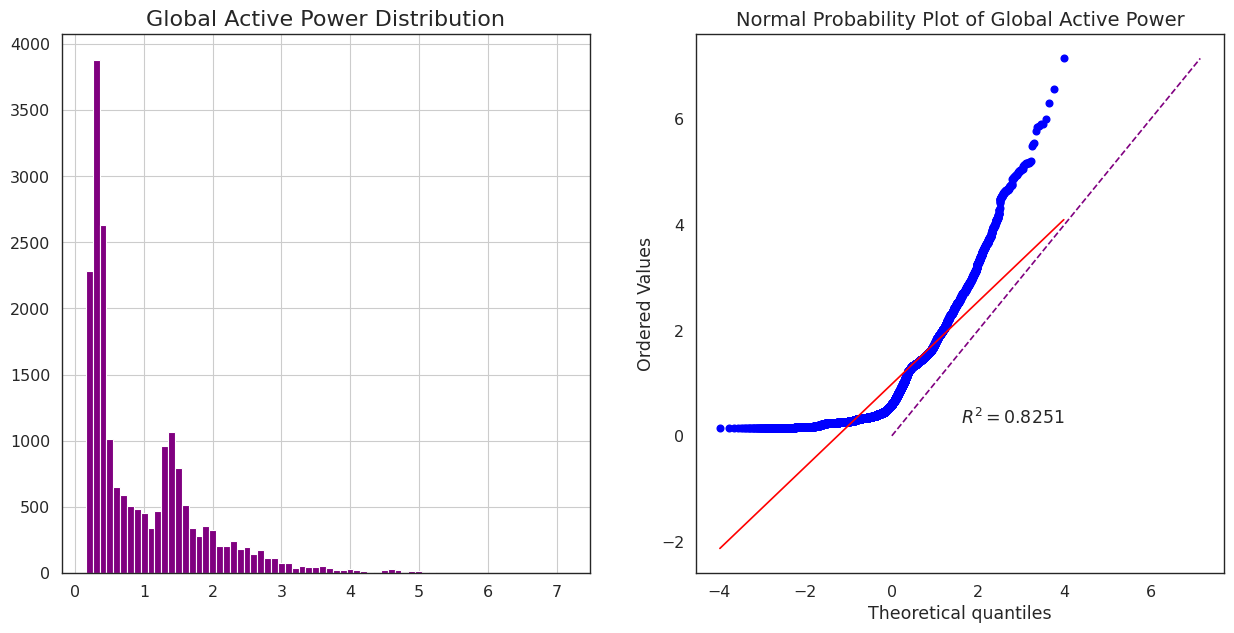

In [ ]:
# Plotting the histogram and normal probability plot for 'Global_active_power' column
plt.figure(figsize=(15,7))

# Histogram of 'Global_active_power' column
plt.subplot(1,2,1)
data1['Global_active_power'].hist(bins=70, color='purple')
plt.title('Global Active Power Distribution', fontsize=16)

# Normal Probability Plot of 'Global_active_power' column
plt.subplot(1,2,2)
# Create the normal probability plot using stats.probplot
stats.probplot(data1['Global_active_power'], plot=plt, fit=True, rvalue=True)
# Add a line to the plot
plt.plot([0, max(data1['Global_active_power'])], [0, max(data1['Global_active_power'])], color='purple', linestyle='--')
plt.title('Normal Probability Plot of Global Active Power', fontsize=14)


# Printing the summary statistics of 'Global_active_power' column
print(data1.describe().T)

                       count                           mean  \
date_time                177  2010-07-08 05:14:38.983051008   
Global_active_power 177.0000                         0.9061   
year                177.0000                      2010.0000   
quarter             177.0000                         3.0000   
month               177.0000                         7.0000   
day                 177.0000                         7.7288   
weekday             177.0000                         0.7175   

                                     min                  25%  \
date_time            2010-07-01 01:45:00  2010-07-04 04:30:00   
Global_active_power               0.1560               0.3380   
year                           2010.0000            2010.0000   
quarter                           3.0000               3.0000   
month                             7.0000               7.0000   
day                               1.0000               4.0000   
weekday                           0.0000

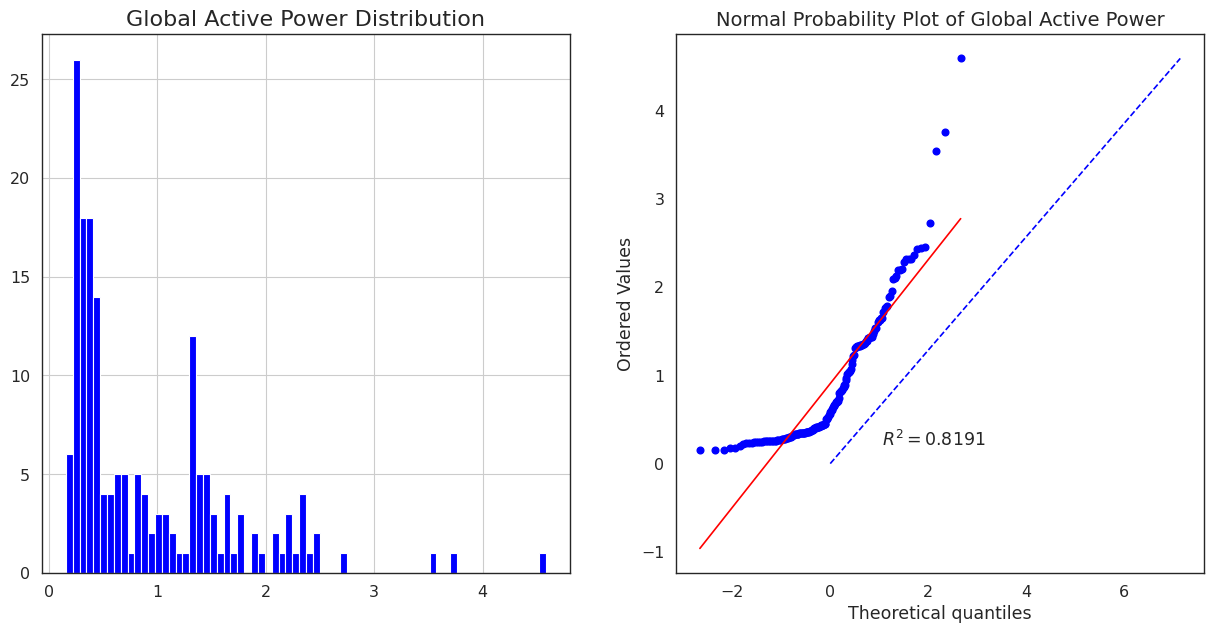

In [ ]:
plt.figure(figsize=(15,7))

# Histogram of 'Global_active_power' column
plt.subplot(1,2,1)
data3['Global_active_power'].hist(bins=70, color='blue')
plt.title('Global Active Power Distribution', fontsize=16)

# Normal Probability Plot of 'Global_active_power' column
plt.subplot(1,2,2)
# Create the normal probability plot using stats.probplot
stats.probplot(data3['Global_active_power'], plot=plt, fit=True, rvalue=True)
# Add a line to the plot
plt.plot([0, max(data1['Global_active_power'])], [0, max(data3['Global_active_power'])], color='blue', linestyle='--')
plt.title('Normal Probability Plot of Global Active Power', fontsize=14)


# Printing the summary statistics of 'Global_active_power' column
print(data3.describe().T)

In [ ]:
data1.head()

,date_time,Global_active_power,year,quarter,month,day,weekday
1839272,2010-07-01 00:00:00,0.4500,2010,3,7,1,1
1839273,2010-07-01 00:01:00,0.4260,2010,3,7,1,1
1839274,2010-07-01 00:02:00,0.3660,2010,3,7,1,1
1839275,2010-07-01 00:03:00,0.3540,2010,3,7,1,1
1839276,2010-07-01 00:04:00,0.3340,2010,3,7,1,1


In [ ]:
data1=data.loc[:,['date_time','Global_active_power']]
data1.set_index('date_time',inplace=True)

data4=data2.loc[:,['date_time','Global_active_power']]
data4.set_index('date_time',inplace=True)

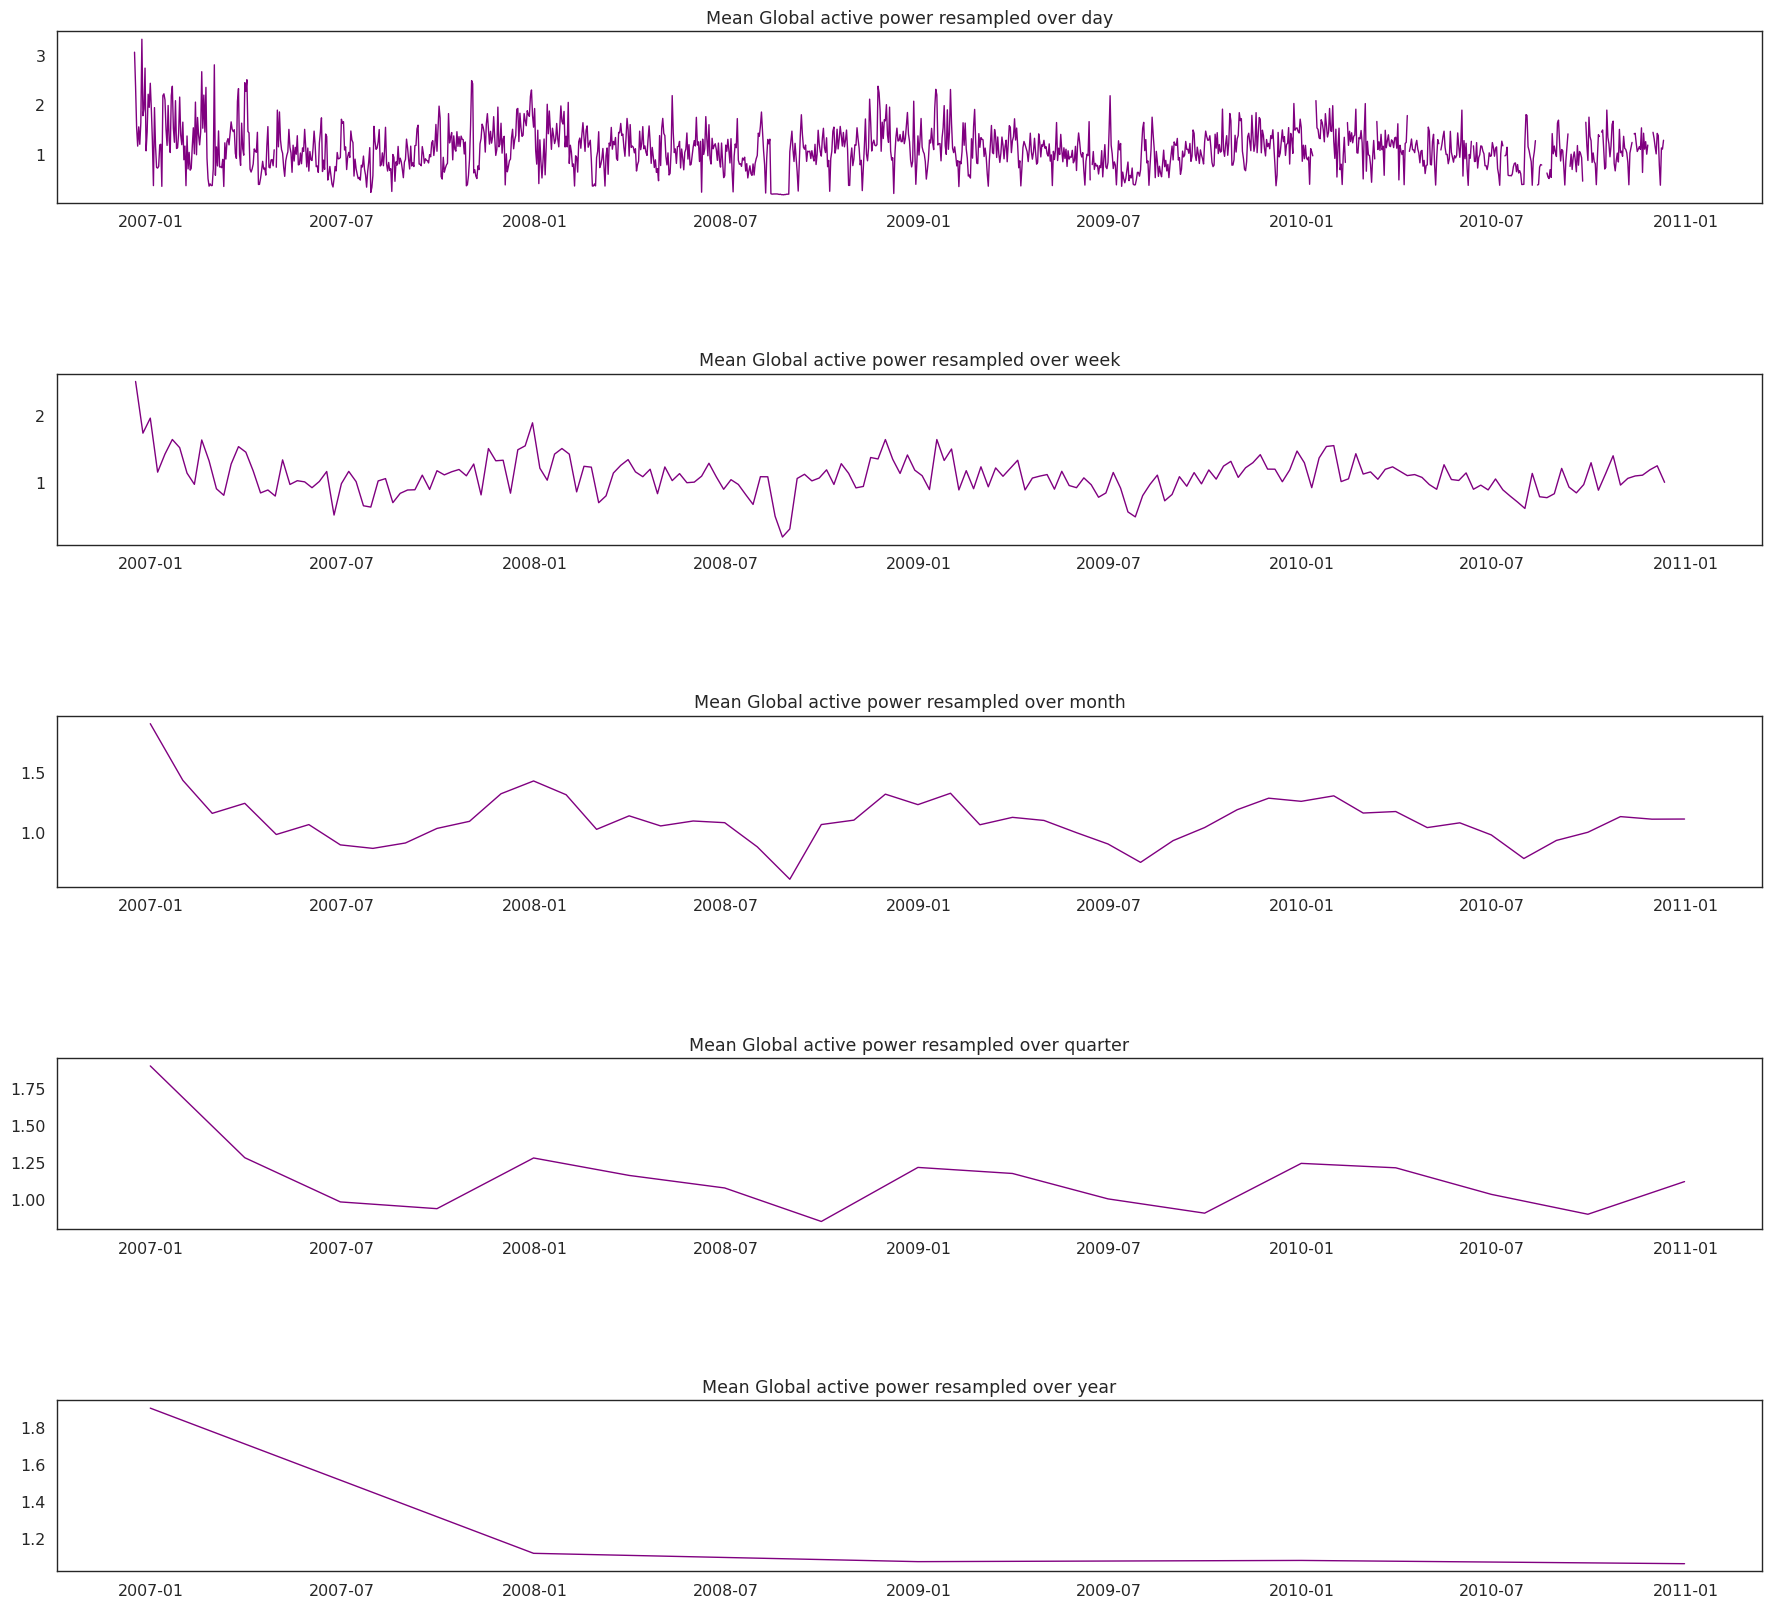

In [ ]:
fig = plt.figure(figsize=(22,20))
# Adjust the subplot spacing
fig.subplots_adjust(hspace=1)

# Create first subplot
ax1 = fig.add_subplot(5,1,1)
# Plot the resampled mean of Global_active_power over day with different color
ax1.plot(data1['Global_active_power'].resample('D').mean(), linewidth=1, color='purple')
# Set the title for the subplot
ax1.set_title('Mean Global active power resampled over day')
# Set major tick parameters for the subplot
ax1.tick_params(axis='both', which='major')

# Create second subplot
ax2 = fig.add_subplot(5,1,2, sharex=ax1)
# Plot the resampled mean of Global_active_power over week with different color
ax2.plot(data1['Global_active_power'].resample('W').mean(), linewidth=1, color='purple')
# Set the title for the subplot
ax2.set_title('Mean Global active power resampled over week')
# Set major tick parameters for the subplot
ax2.tick_params(axis='both', which='major')

# Create third subplot
ax3 = fig.add_subplot(5,1,3, sharex=ax1)
# Plot the resampled mean of Global_active_power over month with different color
ax3.plot(data1['Global_active_power'].resample('M').mean(), linewidth=1, color='purple')
# Set the title for the subplot
ax3.set_title('Mean Global active power resampled over month')
# Set major tick parameters for the subplot
ax3.tick_params(axis='both', which='major')

# Create third subplot
ax4  = fig.add_subplot(5,1,4, sharex=ax1)
# Plot the resampled mean of Global_active_power over month with different color
ax4.plot(data1['Global_active_power'].resample('Q').mean(),linewidth=1, color='purple')
# Set the title for the subplot
ax4.set_title('Mean Global active power resampled over quarter')
# Set major tick parameters for the subplot
ax4.tick_params(axis='both', which='major')


# Create third subplot
ax5  = fig.add_subplot(5,1,5, sharex=ax1)
# Plot the resampled mean of Global_active_power over month with different color
ax5.plot(data1['Global_active_power'].resample('A').mean(),linewidth=1, color='purple')
# Set the title for the subplot
ax5.set_title('Mean Global active power resampled over year')
# Set major tick parameters for the subplot
ax5.tick_params(axis='both', which='major')

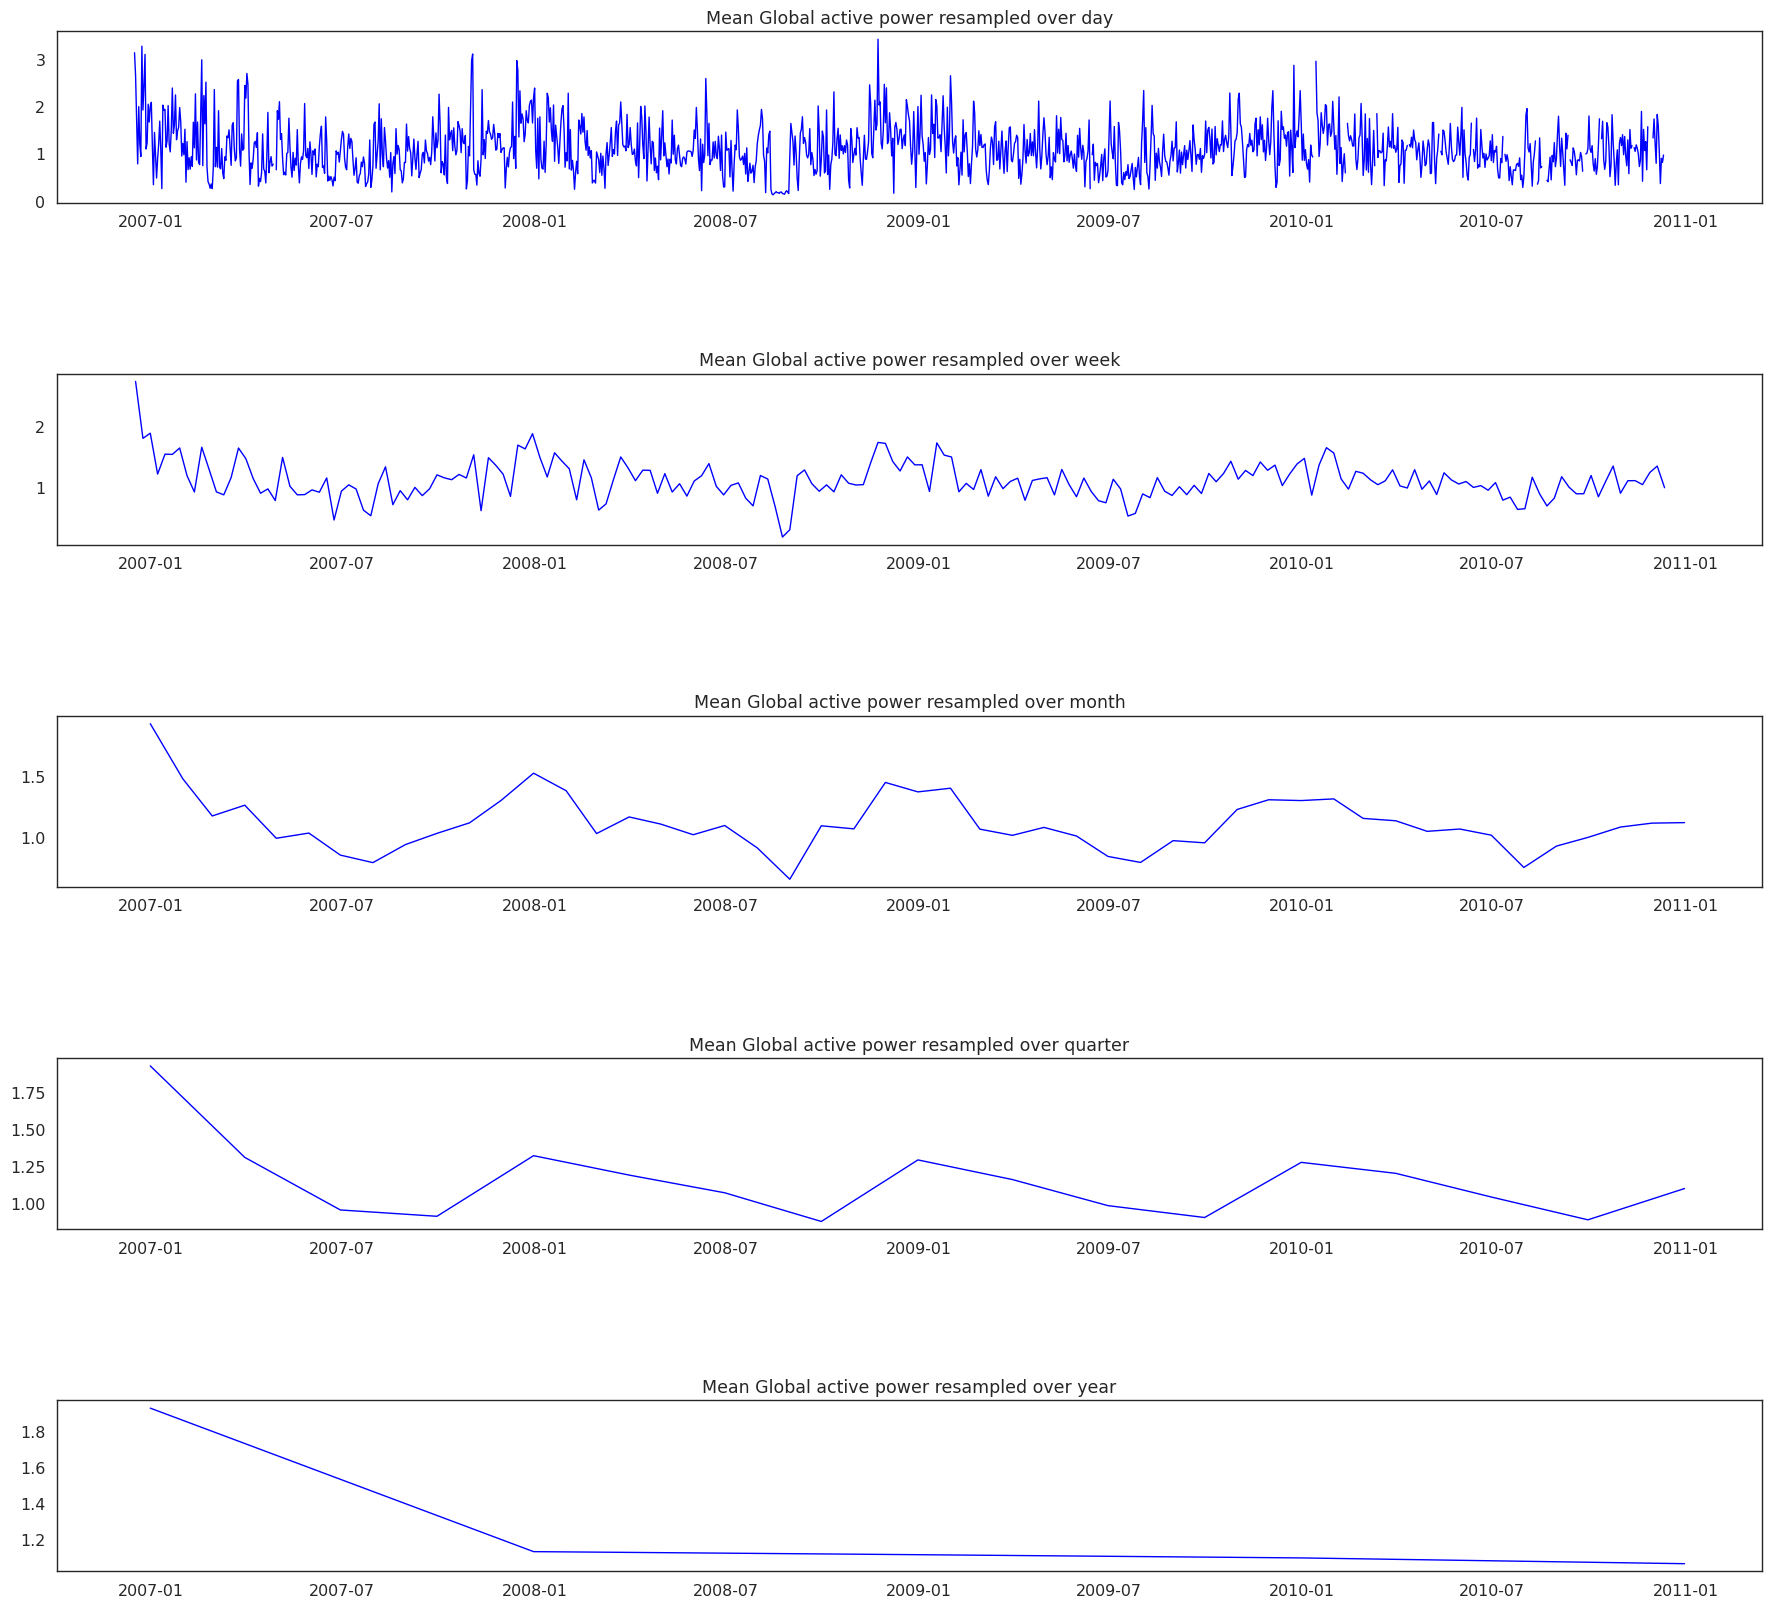

In [ ]:
fig = plt.figure(figsize=(22,20))
# Adjust the subplot spacing
fig.subplots_adjust(hspace=1)

# Create first subplot
ax1 = fig.add_subplot(5,1,1)
# Plot the resampled mean of Global_active_power over day with different color
ax1.plot(data4['Global_active_power'].resample('D').mean(), linewidth=1, color='blue')
# Set the title for the subplot
ax1.set_title('Mean Global active power resampled over day')
# Set major tick parameters for the subplot
ax1.tick_params(axis='both', which='major')

# Create second subplot
ax2 = fig.add_subplot(5,1,2, sharex=ax1)
# Plot the resampled mean of Global_active_power over week with different color
ax2.plot(data4['Global_active_power'].resample('W').mean(), linewidth=1, color='blue')
# Set the title for the subplot
ax2.set_title('Mean Global active power resampled over week')
# Set major tick parameters for the subplot
ax2.tick_params(axis='both', which='major')

# Create third subplot
ax3 = fig.add_subplot(5,1,3, sharex=ax1)
# Plot the resampled mean of Global_active_power over month with different color
ax3.plot(data4['Global_active_power'].resample('M').mean(), linewidth=1, color='blue')
# Set the title for the subplot
ax3.set_title('Mean Global active power resampled over month')
# Set major tick parameters for the subplot
ax3.tick_params(axis='both', which='major')

# Create third subplot
ax4  = fig.add_subplot(5,1,4, sharex=ax1)
# Plot the resampled mean of Global_active_power over month with different color
ax4.plot(data4['Global_active_power'].resample('Q').mean(),linewidth=1, color='blue')
# Set the title for the subplot
ax4.set_title('Mean Global active power resampled over quarter')
# Set major tick parameters for the subplot
ax4.tick_params(axis='both', which='major')


# Create third subplot
ax5  = fig.add_subplot(5,1,5, sharex=ax1)
# Plot the resampled mean of Global_active_power over month with different color
ax5.plot(data4['Global_active_power'].resample('A').mean(),linewidth=1, color='blue')
# Set the title for the subplot
ax5.set_title('Mean Global active power resampled over year')
# Set major tick parameters for the subplot
ax5.tick_params(axis='both', which='major')

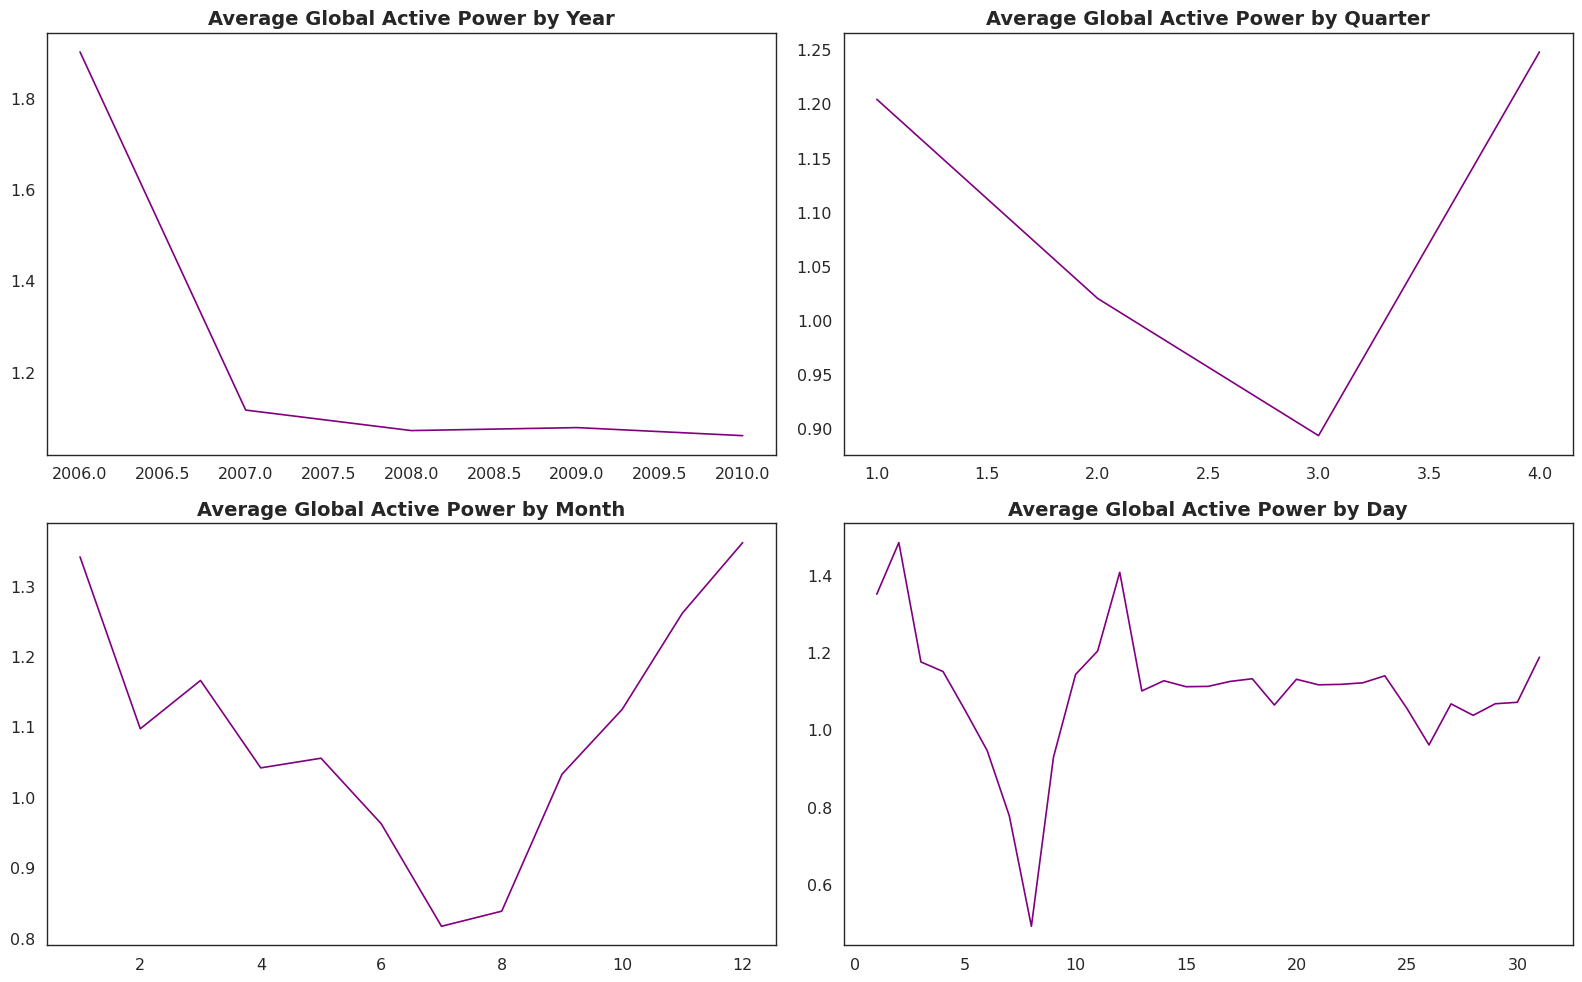

In [ ]:
# Import the matplotlib library for plotting graphs
import matplotlib.pyplot as plt

# Create a figure with 2 rows and 2 columns and set its size to 14x8
plt.figure(figsize=(16,10))

# First subplot in the first row, first column
plt.subplot(2,2,1)
# Group data by year and take the mean of the 'Global_active_power' column
grouped_by_year = data.groupby('year').Global_active_power.agg('mean')
# Plot the mean of 'Global_active_power' by year with red color
grouped_by_year.plot(color='purple')
# Set the x label to be empty
plt.xlabel('')
# Set the title to 'Average Global Active Power by Year' with font size 12 and font weight 'bold'
plt.title('Average Global Active Power by Year', fontsize=14, fontweight='bold')

# Second subplot in the first row, second column
plt.subplot(2,2,2)
# Group data by quarter and take the mean of the 'Global_active_power' column
grouped_by_quarter = data.groupby('quarter').Global_active_power.agg('mean')
# Plot the mean of 'Global_active_power' by quarter with blue color
grouped_by_quarter.plot(color='purple')
# Set the x label to be empty
plt.xlabel('')
# Set the title to 'Average Global Active Power by Quarter' with font size 12 and font weight 'bold'
plt.title('Average Global Active Power by Quarter', fontsize=14, fontweight='bold')

# Third subplot in the second row, first column
plt.subplot(2,2,3)
# Group data by month and take the mean of the 'Global_active_power' column
grouped_by_month = data.groupby('month').Global_active_power.agg('mean')
# Plot the mean of 'Global_active_power' by month with purple color
grouped_by_month.plot(color='purple')
# Set the x label to be empty
plt.xlabel('')
# Set the title to 'Average Global Active Power by Month' with font size 12 and font weight 'bold'
plt.title('Average Global Active Power by Month', fontsize=14, fontweight='bold')

# Fourth subplot in the second row, second column
plt.subplot(2,2,4)
# Group data by day and take the mean of the 'Global_active_power' column
grouped_by_day = data.groupby('day').Global_active_power.agg('mean')
# Plot the mean of 'Global_active_power' by day with green color
grouped_by_day.plot(color='purple')
# Set the x label to be empty
plt.xlabel('')
# Set the title to 'Average Global Active Power by Day' with font size 12 and font weight 'bold'
plt.title('Average Global Active Power by Day', fontsize=14, fontweight='bold')

# Use tight_layout to adjust the subplots so that they fit into the figure area
plt.tight_layout()

# Show the plot
plt.show()

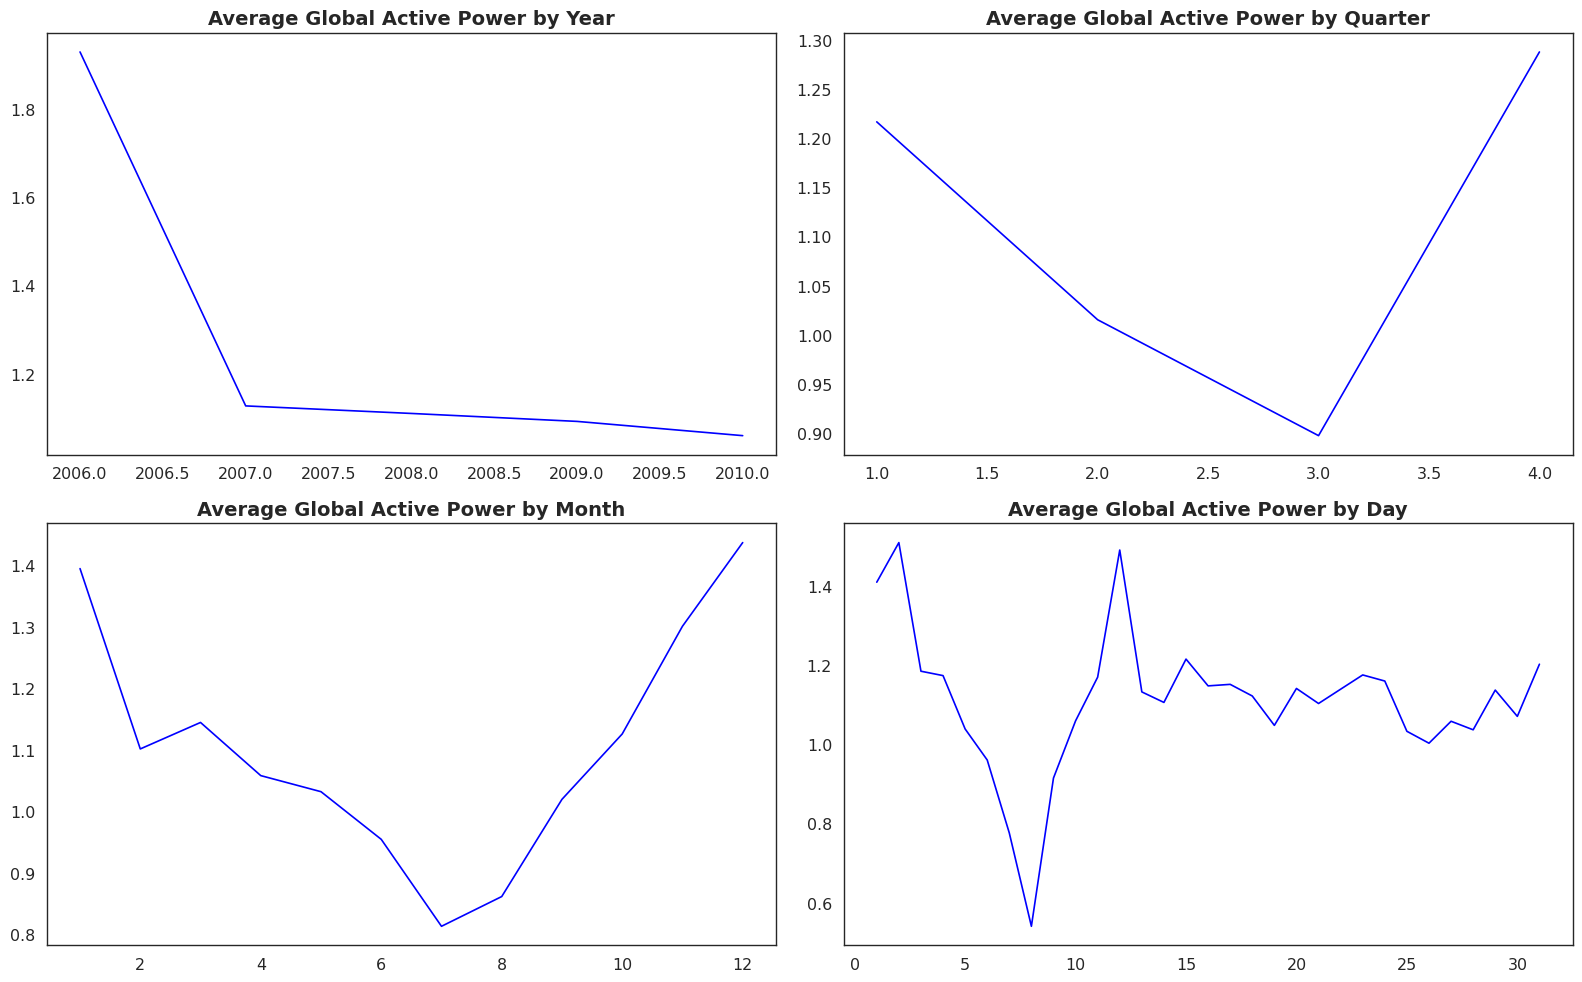

In [ ]:
# Import the matplotlib library for plotting graphs
import matplotlib.pyplot as plt

# Create a figure with 2 rows and 2 columns and set its size to 14x8
plt.figure(figsize=(16,10))

# First subplot in the first row, first column
plt.subplot(2,2,1)
# Group data by year and take the mean of the 'Global_active_power' column
grouped_by_year = data2.groupby('year').Global_active_power.agg('mean')
# Plot the mean of 'Global_active_power' by year with red color
grouped_by_year.plot(color='blue')
# Set the x label to be empty
plt.xlabel('')
# Set the title to 'Average Global Active Power by Year' with font size 12 and font weight 'bold'
plt.title('Average Global Active Power by Year', fontsize=14, fontweight='bold')

# Second subplot in the first row, second column
plt.subplot(2,2,2)
# Group data by quarter and take the mean of the 'Global_active_power' column
grouped_by_quarter = data2.groupby('quarter').Global_active_power.agg('mean')
# Plot the mean of 'Global_active_power' by quarter with blue color
grouped_by_quarter.plot(color='blue')
# Set the x label to be empty
plt.xlabel('')
# Set the title to 'Average Global Active Power by Quarter' with font size 12 and font weight 'bold'
plt.title('Average Global Active Power by Quarter', fontsize=14, fontweight='bold')

# Third subplot in the second row, first column
plt.subplot(2,2,3)
# Group data by month and take the mean of the 'Global_active_power' column
grouped_by_month = data2.groupby('month').Global_active_power.agg('mean')
# Plot the mean of 'Global_active_power' by month with purple color
grouped_by_month.plot(color='blue')
# Set the x label to be empty
plt.xlabel('')
# Set the title to 'Average Global Active Power by Month' with font size 12 and font weight 'bold'
plt.title('Average Global Active Power by Month', fontsize=14, fontweight='bold')

# Fourth subplot in the second row, second column
plt.subplot(2,2,4)
# Group data by day and take the mean of the 'Global_active_power' column
grouped_by_day = data2.groupby('day').Global_active_power.agg('mean')
# Plot the mean of 'Global_active_power' by day with green color
grouped_by_day.plot(color='blue')
# Set the x label to be empty
plt.xlabel('')
# Set the title to 'Average Global Active Power by Day' with font size 12 and font weight 'bold'
plt.title('Average Global Active Power by Day', fontsize=14, fontweight='bold')

# Use tight_layout to adjust the subplots so that they fit into the figure area
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
import pandas as pd
from matplotlib import pyplot
from statsmodels.tsa.stattools import adfuller

In [ ]:
def test_stationarity(timeseries):
    # Calculate rolling mean and standard deviation
    rolmean = timeseries.rolling(window=30).mean()
    rolstd = timeseries.rolling(window=30).std()

    # Plot original timeseries, rolling mean, and rolling standard deviation
    plt.figure(figsize=(20,5))
    sns.despine(left=True)
    orig = plt.plot(timeseries, color='purple',label='Original')
    mean = plt.plot(rolmean, color='yellow', label='Rolling Mean')
    std = plt.plot(rolstd, color='cyan', label = 'Rolling Std')

    # Add legend
    plt.legend(loc='best')
    # Add title
    plt.title('Rolling Mean & Standard Deviation of Global Active Power')
    plt.show()

    # Perform and display results of Dickey-Fuller test
    print ('<Results of Dickey-Fuller Test>')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4],
                     index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

In [ ]:
# test_stationarity(data2.Global_active_power.dropna())

# lstm for sampled data

In [ ]:
#Transform the Global_active_power column of the data DataFrame into a numpy array of float values

dataset = data2.Global_active_power.values.astype('float32')
#Reshape the numpy array into a 2D array with 1 column

dataset = np.reshape(dataset, (-1, 1))
#Create an instance of the MinMaxScaler class to scale the values between 0 and 1

scaler = MinMaxScaler(feature_range=(0, 1))
#Fit the MinMaxScaler to the transformed data and transform the values

dataset = scaler.fit_transform(dataset)
#Split the transformed data into a training set (80%) and a test set (20%)

train_size = int(len(dataset) * 0.80)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

In [ ]:
col_dates = data2.Global_active_power.values
col_dates = np.reshape(col_dates, (-1, 1))
date_train, date_test = col_dates[0:train_size, :], col_dates[train_size:len(dataset), :]

def create_dataset(dataset, dates, look_back=1):
    X, Y = [], []
    d = []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
        d.append(dates[i + look_back, 0])
    return np.array(X), np.array(Y), np.array(d)

look_back = 30




X_train, Y_train, d_train = create_dataset(train, date_train, look_back)
# X_val, Y_val, d_val = create_dataset(val, date_val, look_back)
X_test, Y_test, d_test = create_dataset(test, date_test, look_back)

X_train2, Y_train2, d_train2 = create_dataset(train, date_train, look_back)
X_test2, Y_test2, d_test2 = create_dataset(test, date_test, look_back)

X_train3, Y_train3, d_train3 = X_train, Y_train, d_train
X_test3, Y_test3, d_test3 = X_test, Y_test, d_test

X_train4, Y_train4, d_train4 = X_train, Y_train, d_train
# X_val4, Y_val4, d_val4 = X_val, Y_val, d_val
X_test4, Y_test4, d_test4 = X_test, Y_test, d_test

X_train5, Y_train5, d_train5 = X_train, Y_train, d_train
X_test5, Y_test5, d_test5 = X_test, Y_test, d_test

In [ ]:
X_train.shape

(16371, 30)

In [ ]:
Y_train.shape

(16371,)

In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [ ]:
X_train2 = np.reshape(X_train2, (X_train2.shape[0], 1, X_train2.shape[1]))
X_test2 = np.reshape(X_test2, (X_test2.shape[0], 1, X_test2.shape[1]))

In [ ]:
X_train3 = np.reshape(X_train3, (X_train3.shape[0], 1, X_train3.shape[1]))
X_test3 = np.reshape(X_test3, (X_test3.shape[0], 1, X_test3.shape[1]))

In [ ]:
X_train4 = np.reshape(X_train4, (X_train4.shape[0], 1, X_train4.shape[1]))
# X_val4 = np.reshape(X_val4, (X_val4.shape[0], 1, X_val4.shape[1]))
X_test4 = np.reshape(X_test4, (X_test4.shape[0], 1, X_test4.shape[1]))

X_train5 = np.reshape(X_train5, (X_train5.shape[0], 1, X_train5.shape[1]))
X_test5 = np.reshape(X_test5, (X_test5.shape[0], 1, X_test5.shape[1]))

In [ ]:
X_train2.shape

(16371, 1, 30)

In [ ]:
# Defining the LSTM model
model = Sequential()

# Adding the first layer with 100 LSTM units and input shape of the data
model.add(LSTM(100, input_shape=(X_train.shape[1], X_train.shape[2])))

# Adding a dropout layer to avoid overfitting
model.add(Dropout(0.2))

# Adding a dense layer with 1 unit to make predictions
model.add(Dense(1))

# Compiling the model with mean squared error as the loss function and using Adam optimizer
model.compile(loss='mean_squared_error', optimizer='adam')

# Fitting the model on training data and using early stopping to avoid overfitting
history1 = model.fit(X_train, Y_train, epochs=10, batch_size=1600, validation_data=(X_test, Y_test),
                    callbacks=[EarlyStopping(monitor='val_loss', patience=4)], verbose=1, shuffle=False)

# Displaying a summary of the model
model.summary()

Epoch 1/10
11/11 [==============================] - 4s 121ms/step - loss: 0.0171 - val_loss: 0.0076
Epoch 2/10
11/11 [==============================] - 0s 41ms/step - loss: 0.0111 - val_loss: 0.0083
Epoch 3/10
11/11 [==============================] - 0s 41ms/step - loss: 0.0103 - val_loss: 0.0072
Epoch 4/10
11/11 [==============================] - 0s 40ms/step - loss: 0.0100 - val_loss: 0.0071
Epoch 5/10
11/11 [==============================] - 1s 46ms/step - loss: 0.0097 - val_loss: 0.0070
Epoch 6/10
11/11 [==============================] - 0s 35ms/step - loss: 0.0095 - val_loss: 0.0069
Epoch 7/10
11/11 [==============================] - 0s 25ms/step - loss: 0.0093 - val_loss: 0.0067
Epoch 8/10
11/11 [==============================] - 0s 23ms/step - loss: 0.0092 - val_loss: 0.0067
Epoch 9/10
11/11 [==============================] - 0s 24ms/step - loss: 0.0090 - val_loss: 0.0066
Epoch 10/10
11/11 [==============================] - 0s 25ms/step - loss: 0.0089 - val_loss: 0.0065
Model: "

In [ ]:
model1 = Sequential()

# Add the Bi-LSTM layer with 100 units in each direction
model1.add(Bidirectional(LSTM(100, return_sequences=True), input_shape=(X_train2.shape[1], X_train2.shape[2])))

# Add dropout for regularization
model1.add(Dropout(0.2))

# Add another Bi-LSTM layer, no need for return_sequences here as it's the last LSTM layer
model1.add(Bidirectional(LSTM(100)))

# Add the output layer
model1.add(Dense(1))

# Compile the model
model1.compile(loss='mean_squared_error', optimizer='adam')

# Fit the model
history2 = model1.fit(X_train2, Y_train2, epochs=10, batch_size=1600, validation_data=(X_test2, Y_test2),
                    callbacks=[EarlyStopping(monitor='val_loss', patience=4)], verbose=1, shuffle=False)

# Display model summary
model1.summary()

Epoch 1/10
11/11 [==============================] - 12s 408ms/step - loss: 0.0132 - val_loss: 0.0087
Epoch 2/10
11/11 [==============================] - 2s 135ms/step - loss: 0.0102 - val_loss: 0.0071
Epoch 3/10
11/11 [==============================] - 1s 97ms/step - loss: 0.0095 - val_loss: 0.0069
Epoch 4/10
11/11 [==============================] - 1s 114ms/step - loss: 0.0091 - val_loss: 0.0065
Epoch 5/10
11/11 [==============================] - 1s 113ms/step - loss: 0.0087 - val_loss: 0.0064
Epoch 6/10
11/11 [==============================] - 1s 113ms/step - loss: 0.0085 - val_loss: 0.0063
Epoch 7/10
11/11 [==============================] - 1s 112ms/step - loss: 0.0084 - val_loss: 0.0062
Epoch 8/10
11/11 [==============================] - 1s 110ms/step - loss: 0.0083 - val_loss: 0.0062
Epoch 9/10
11/11 [==============================] - 1s 96ms/step - loss: 0.0083 - val_loss: 0.0062
Epoch 10/10
11/11 [==============================] - 1s 98ms/step - loss: 0.0083 - val_loss: 0.0062
M

In [ ]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)
# invert predictions
train_predict = scaler.inverse_transform(train_predict)
Y_train = scaler.inverse_transform([Y_train])
test_predict = scaler.inverse_transform(test_predict)
Y_test = scaler.inverse_transform([Y_test])

print('Train Mean Absolute Error:', mean_absolute_error(Y_train[0], train_predict[:,0]))
print('Train Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_train[0], train_predict[:,0])))
print('Test Mean Absolute Error:', mean_absolute_error(Y_test[0], test_predict[:,0]))
print('Test Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_test[0], test_predict[:,0])))

128/128 [==============================] - 0s 2ms/step
Train Mean Absolute Error: 0.7360319687199064
Train Root Mean Squared Error: 0.9891227038430341
Test Mean Absolute Error: 0.6576196747492752
Test Root Mean Squared Error: 0.8537124355720989


In [ ]:
train_predict1 = model1.predict(X_train2)
test_predict1 = model1.predict(X_test2)
# invert predictions
train_predict1 = scaler.inverse_transform(train_predict1)
Y_train2 = scaler.inverse_transform([Y_train2])
test_predict1 = scaler.inverse_transform(test_predict1)
Y_test2 = scaler.inverse_transform([Y_test2])

print('Train Mean Absolute Error:', mean_absolute_error(Y_train2[0], train_predict1[:,0]))
print('Train Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_train2[0], train_predict1[:,0])))
print('Test Mean Absolute Error:', mean_absolute_error(Y_test2[0], test_predict1[:,0]))
print('Test Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_test2[0], test_predict1[:,0])))


128/128 [==============================] - 0s 4ms/step
Train Mean Absolute Error: 0.6825022602014098
Train Root Mean Squared Error: 0.961469972971313
Test Mean Absolute Error: 0.6099995677412543
Test Root Mean Squared Error: 0.8349384033178019


In [ ]:
from tensorflow.keras.layers import GRU, Dropout, Dense

model3 = Sequential()

# Add the GRU layer with 100 units
model3.add(GRU(100, input_shape=(X_train3.shape[1], X_train3.shape[2])))

# Add dropout for regularization
model3.add(Dropout(0.2))

# Add the output layer
model3.add(Dense(1))

# Compile the model
model3.compile(loss='mean_squared_error', optimizer='adam')

# Fit the model
history3 = model3.fit(X_train3, Y_train3, epochs=10, batch_size=1600, validation_data=(X_test3, Y_test3),
                    callbacks=[EarlyStopping(monitor='val_loss', patience=4)], verbose=1, shuffle=False)

# Display model summary
model3.summary()

Epoch 1/10
11/11 [==============================] - 4s 116ms/step - loss: 0.0181 - val_loss: 0.0110
Epoch 2/10
11/11 [==============================] - 0s 38ms/step - loss: 0.0125 - val_loss: 0.0074
Epoch 3/10
11/11 [==============================] - 0s 41ms/step - loss: 0.0107 - val_loss: 0.0072
Epoch 4/10
11/11 [==============================] - 0s 35ms/step - loss: 0.0100 - val_loss: 0.0071
Epoch 5/10
 1/11 [=>............................] - ETA: 0s - loss: 0.0133

KeyboardInterrupt: 

In [ ]:
train_predict2 = model3.predict(X_train3)
test_predict2 = model3.predict(X_test3)
# invert predictions
train_predict2 = scaler.inverse_transform(train_predict2)
Y_train3 = scaler.inverse_transform([Y_train3])
test_predict2 = scaler.inverse_transform(test_predict2)
Y_test3 = scaler.inverse_transform([Y_test3])

print('Train Mean Absolute Error:', mean_absolute_error(Y_train3[0], train_predict2[:,0]))
print('Train Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_train3[0], train_predict2[:,0])))
print('Test Mean Absolute Error:', mean_absolute_error(Y_test3[0], test_predict2[:,0]))
print('Test Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_test3[0], test_predict2[:,0])))

In [ ]:
plt.figure(figsize=(8,4))
plt.plot(history1.history['loss'], label='Train Loss LSTM')
plt.plot(history1.history['val_loss'], label='Test Loss LSTM')
plt.plot(history2.history['loss'], label='Train Loss BiLSTM')
plt.plot(history2.history['val_loss'], label='Test Loss BiLSTM')
plt.plot(history3.history['loss'], label='Train Loss GRU')
plt.plot(history3.history['val_loss'], label='Test Loss GRU')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(loc='upper right')
plt.show();

In [ ]:
aa=[x for x in range(100)]
# Creating a figure object with desired figure size
plt.figure(figsize=(20,6))

# Plotting the actual values in blue with a dot marker
plt.plot(aa, Y_test[0][:100], marker='.', label="actual", color='purple')

# Plotting the predicted values in green with a solid line
plt.plot(aa, test_predict[:,0][:100], '-', label="LSTM prediction", color='red')

plt.plot(aa, test_predict1[:,0][:100], '-', label="BiLSTM prediction", color='green')
plt.plot(aa, test_predict2[:,0][:100], '-', label="GRU prediction", color='black')

# Removing the top spines
sns.despine(top=True)

# Adjusting the subplot location
plt.subplots_adjust(left=0.07)

# Labeling the y-axis
plt.ylabel('Global_active_power', size=14)

# Labeling the x-axis
plt.xlabel('Time step', size=14)

# Adding a legend with font size of 15
plt.legend(fontsize=16)

# Display the plot
plt.show()


In [ ]:

aa = [x for x in range(100)]

# Increase figure size and adjust y-axis limits for more spacing
plt.figure(figsize=(15, 10))
plt.ylim(bottom=min(Y_test[0][:100]) - 0.4 * (max(Y_test[0][:100]) - min(Y_test[0][:100])),
        top=max(Y_test[0][:100]) + 0.4 * (max(Y_test[0][:100]) - min(Y_test[0][:100])))

# Plot actual values with thicker line
plt.plot(aa, Y_test[0][:100], marker='.', linewidth=2, label="actual", color='purple')

# Emphasize LSTM prediction with slightly thicker line and brighter color
plt.plot(aa, test_predict[:, 0][:100], '--', linewidth=2, label="LSTM prediction", color='red')

# Increase separation between BiLSTM and GRU curves:
    # Use distinct linestyles (dot-dash for BiLSTM and dotted for GRU)
    # Increase vertical offset by a small amount
plt.plot(aa, test_predict1[:, 0][:100], '-.', label="BiLSTM prediction", color='green', alpha=0.8)
plt.plot(aa, test_predict2[:, 0][:100], ':', label="GRU prediction", color='black', alpha=0.8)
# Customize plot appearance and legend
sns.despine(top=True)
plt.subplots_adjust(left=0.07)
plt.ylabel('Global_active_power', size=14)
plt.xlabel('Time step', size=14)
plt.legend(fontsize=16, loc='upper left')
plt.show()

# lstm for total 20M data

In [ ]:
#Transform the Global_active_power column of the data DataFrame into a numpy array of float values

dataset = data.Global_active_power.values.astype('float32')
#Reshape the numpy array into a 2D array with 1 column

dataset = np.reshape(dataset, (-1, 1))
#Create an instance of the MinMaxScaler class to scale the values between 0 and 1

scaler = MinMaxScaler(feature_range=(0, 1))
#Fit the MinMaxScaler to the transformed data and transform the values

dataset = scaler.fit_transform(dataset)
#Split the transformed data into a training set (80%) and a test set (20%)

train_size = int(len(dataset) * 0.80)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

In [ ]:
col_dates = data.Global_active_power.values
col_dates = np.reshape(col_dates, (-1, 1))
date_train, date_test = col_dates[0:train_size, :], col_dates[train_size:len(dataset), :]

def create_dataset(dataset, dates, look_back=1):
    X, Y = [], []
    d = []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
        d.append(dates[i + look_back, 0])
    return np.array(X), np.array(Y), np.array(d)

look_back = 30




X_train, Y_train, d_train = create_dataset(train, date_train, look_back)
# X_val, Y_val, d_val = create_dataset(val, date_val, look_back)
X_test, Y_test, d_test = create_dataset(test, date_test, look_back)

X_train2, Y_train2, d_train2 = create_dataset(train, date_train, look_back)
X_test2, Y_test2, d_test2 = create_dataset(test, date_test, look_back)

X_train3, Y_train3, d_train3 = X_train, Y_train, d_train
X_test3, Y_test3, d_test3 = X_test, Y_test, d_test

X_train4, Y_train4, d_train4 = X_train, Y_train, d_train
# X_val4, Y_val4, d_val4 = X_val, Y_val, d_val
X_test4, Y_test4, d_test4 = X_test, Y_test, d_test

X_train5, Y_train5, d_train5 = X_train, Y_train, d_train
X_test5, Y_test5, d_test5 = X_test, Y_test, d_test

In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))
X_train.shape

(1639393, 1, 30)

In [ ]:
X_train2 = np.reshape(X_train2, (X_train2.shape[0], 1, X_train2.shape[1]))
X_test2 = np.reshape(X_test2, (X_test2.shape[0], 1, X_test2.shape[1]))
X_train2.shape

X_train4 = np.reshape(X_train4, (X_train4.shape[0], 1, X_train4.shape[1]))
# X_val4 = np.reshape(X_val4, (X_val4.shape[0], 1, X_val4.shape[1]))
X_test4 = np.reshape(X_test4, (X_test4.shape[0], 1, X_test4.shape[1]))

X_train5 = np.reshape(X_train5, (X_train5.shape[0], 1, X_train5.shape[1]))
X_test5 = np.reshape(X_test5, (X_test5.shape[0], 1, X_test5.shape[1]))

In [ ]:
!pip install keras-tcn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 14.0 MB/s eta 0:00:00
  Attempting uninstall: typeguard
    Found existing installation: typeguard 4.3.0
    Uninstalling typeguard-4.3.0:
      Successfully uninstalled typeguard-4.3.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
inflect 7.4.0 requires typeguard>=4.0.1, but you have typeguard 2.13.3 which is incompatible.


In [ ]:
import numpy as np
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.layers import Concatenate, Dense, LSTM, GRU, Bidirectional, Input, Conv1D, GlobalMaxPooling1D, LeakyReLU, Dropout, Attention, TimeDistributed
from tensorflow.keras.models import Model
from adabelief_tf import AdaBeliefOptimizer
from sklearn.metrics import mean_absolute_error, mean_squared_error
from xgboost import XGBRegressor
from tcn import TCN
from tensorflow.keras.layers import Input, Concatenate, Dense, LeakyReLU, Bidirectional, LSTM, Attention, GlobalMaxPooling1D, Reshape
from tensorflow.keras.models import Model


# Define hyperparameters
lstm_units = 64
gru_units = 64
tcn_filters = 64
tcn_kernel_size = 3
initial_learning_rate = 0.001
leaky_relu_alpha = 0.01  # Alpha value for LeakyReLU
num_heads = 4

# Define the LSTM model
def create_lstm_model(input_shape, units=lstm_units):
    inputs = Input(shape=input_shape)
    x = Bidirectional(LSTM(units, return_sequences=True))(inputs)
    x = Bidirectional(LSTM(units))(x)
    x = Dense(64)(x)
    x = LeakyReLU(alpha=leaky_relu_alpha)(x)
    model = Model(inputs=inputs, outputs=x)
    optimizer = AdaBeliefOptimizer(learning_rate=initial_learning_rate, epsilon=1e-14, rectify=True)
    model.compile(loss='mean_squared_error', optimizer=optimizer)
    return model

# Define the GRU model
def create_gru_model(input_shape, units=gru_units):
    inputs = Input(shape=input_shape)
    x = Bidirectional(GRU(units, return_sequences=True))(inputs)
    x = Bidirectional(GRU(units))(x)
    x = Dense(64)(x)
    x = LeakyReLU(alpha=leaky_relu_alpha)(x)
    model = Model(inputs=inputs, outputs=x)
    optimizer = AdaBeliefOptimizer(learning_rate=initial_learning_rate, epsilon=1e-14, rectify=True)
    model.compile(loss='mean_squared_error', optimizer=optimizer)
    return model

# Define the TCN model
def create_tcn_model(input_shape, filters=tcn_filters, kernel_size=tcn_kernel_size):
    inputs = Input(shape=input_shape)
    x = inputs
    for dilation_rate in [4, 8]:
        x = Conv1D(filters, kernel_size, activation='relu', padding='causal', dilation_rate=dilation_rate)(x)
    x = GlobalMaxPooling1D()(x)
    x = Dense(64)(x)
    x = LeakyReLU(alpha=leaky_relu_alpha)(x)
    model = Model(inputs=inputs, outputs=x)
    optimizer = AdaBeliefOptimizer(learning_rate=initial_learning_rate, epsilon=1e-14, rectify=True)
    model.compile(loss='mean_squared_error', optimizer=optimizer)
    return model

# Create instances of the LSTM, GRU, and TCN models
input_shape_lstm = (X_train5.shape[1], X_train5.shape[2])
input_shape_gru = (X_train5.shape[1], X_train5.shape[2])
input_shape_tcn = (X_train5.shape[1], X_train5.shape[2])

lstm_model = create_lstm_model(input_shape_lstm)
gru_model = create_gru_model(input_shape_gru)
tcn_model_instance = create_tcn_model(input_shape_tcn)

# Define the combined model
def combine_models(lstm_model, gru_model, tcn_model):
    # Concatenate the outputs of the three models
    combined_output = Concatenate()([lstm_model.output, gru_model.output, tcn_model.output])

    # Reshape combined_output to have three dimensions if necessary
    combined_output = Reshape((1, combined_output.shape[1]))(combined_output)

    # Apply attention mechanism
    attention = Attention()([combined_output, combined_output])

    # Global max pooling to reduce dimensionality
    attention = GlobalMaxPooling1D()(attention)

    x = Dense(256)(attention)
    x = LeakyReLU(alpha=leaky_relu_alpha)(x)

    x = Dense(128)(attention)
    x = LeakyReLU(alpha=leaky_relu_alpha)(x)
    x = Dense(64)(x)
    x = LeakyReLU(alpha=leaky_relu_alpha)(x)
    x = Dense(32)(x)
    x = LeakyReLU(alpha=leaky_relu_alpha)(x)
    x = Dense(1)(x)

    combined_model = Model(inputs=[lstm_model.input, gru_model.input, tcn_model.input], outputs=x)
    return combined_model


combined_model = combine_models(lstm_model, gru_model, tcn_model_instance)

# Define learning rate scheduler
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=0.0001)

# Compile the combined model with AdaBelief optimizer
combined_model.compile(loss='mean_squared_error', optimizer=AdaBeliefOptimizer(learning_rate=initial_learning_rate, epsilon=1e-14, rectify=True))

# Train the combined model with learning rate scheduler
history_combined = combined_model.fit([X_train5, X_train5, X_train5], Y_train5, epochs=20, batch_size=3200,
                                      validation_data=([X_test5, X_test5, X_test5], Y_test5),
                                      callbacks=[EarlyStopping(monitor='val_loss', patience=4),
                                                 reduce_lr],
                                      verbose=1, shuffle=True)

# Display model summary
combined_model.summary()

# Predictions
lstm_predictions_test = lstm_model.predict(X_test5)
gru_predictions_test = gru_model.predict(X_test5)
tcn_predictions_test = tcn_model_instance.predict(X_test5)
comb_test = combined_model.predict([X_test5, X_test5, X_test5])

lstm_predictions_train = lstm_model.predict(X_train5)
gru_predictions_train = gru_model.predict(X_train5)
tcn_predictions_train = tcn_model_instance.predict(X_train5)
comb_train = combined_model.predict([X_train5, X_train5, X_train5])

# Combine predictions with original test features
combined_features_test = np.concatenate([X_test5.reshape(X_test5.shape[0], -1), comb_test, lstm_predictions_test, gru_predictions_test, tcn_predictions_test], axis=1)
combined_features_train = np.concatenate([X_train5.reshape(X_train5.shape[0], -1), comb_train, lstm_predictions_train, gru_predictions_train, tcn_predictions_train], axis=1)

# Define XGBRegressor model
xgb_model = XGBRegressor()

# Train XGBRegressor on combined features
xgb_model.fit(combined_features_train, Y_train5)

# Make predictions
test_predictions = xgb_model.predict(combined_features_test)

# Inverse transform the predictions and actual values
test_predictions_inv2 = scaler.inverse_transform(test_predictions.reshape(-1, 1))  # Reshape predictions to match scaler dimensions
Y_test5_inv = scaler.inverse_transform(Y_test5.reshape(-1, 1))  # Reshape actual values to match scaler dimensions

# Calculate evaluation metrics
test_mae = mean_absolute_error(Y_test5_inv, test_predictions_inv2)
test_rmse = np.sqrt(mean_squared_error(Y_test5_inv, test_predictions_inv2))

print('Test Mean Absolute Error:', test_mae)
print('Test Root Mean Squared Error:', test_rmse)

comb_test_inv2 = scaler.inverse_transform(comb_test)

tm = mean_absolute_error(Y_test5_inv, comb_test_inv2)
print('Mean Absolute Error for combined model predictions:', tm)
tr = np.sqrt(mean_squared_error(Y_test5_inv, comb_test_inv2))
print('Root Mean Squared Error for combined model predictions:', tr)


Please check your arguments if you have upgraded adabelief-tf from version 0.0.1.
Modifications to default arguments:
                           eps  weight_decouple    rectify
-----------------------  -----  -----------------  -------------
adabelief-tf=0.0.1       1e-08  Not supported      Not supported
>=0.1.0 (Current 0.2.0)  1e-14  supported          default: True
SGD better than Adam (e.g. CNN for Image Classification)    Adam better than SGD (e.g. Transformer, GAN)
----------------------------------------------------------  ----------------------------------------------
Recommended epsilon = 1e-7                                  Recommended epsilon = 1e-14
For a complete table of recommended hyperparameters, see
https://github.com/juntang-zhuang/Adabelief-Optimizer
You can disable the log message by setting "print_change_log = False", though it is recommended to keep as a reminder.

Please check your arguments if you have upgraded adabelief-tf from version 0.0.1.
Modifications t

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.layers import Concatenate, Dense, LSTM, GRU, Bidirectional, Input, Conv1D, GlobalMaxPooling1D, LeakyReLU, Reshape
from tensorflow.keras.models import Model
from adabelief_tf import AdaBeliefOptimizer
from sklearn.metrics import mean_absolute_error, mean_squared_error
from xgboost import XGBRegressor
from tcn import TCN

# Define hyperparameters
lstm_units = 64
gru_units = 64
tcn_filters = 64
tcn_kernel_size = 3
initial_learning_rate = 0.001
leaky_relu_alpha = 0.01
num_heads = 4
d_model = 128  # Dimensionality of attention heads

# Temporal Multi-Head Attention Class
class TemporalMultiHeadAttention(tf.keras.layers.Layer):
    def __init__(self, num_heads, d_model):
        super(TemporalMultiHeadAttention, self).__init__()
        self.num_heads = num_heads
        self.d_model = d_model
        self.depth = d_model // num_heads

        # Define linear layers for query, key, and value
        self.wq = Dense(d_model)
        self.wk = Dense(d_model)
        self.wv = Dense(d_model)

        # Output linear layer
        self.dense = Dense(d_model)

    def split_heads(self, x, batch_size):
        # Split the last dimension into (num_heads, depth)
        x = tf.reshape(x, (batch_size, -1, self.num_heads, self.depth))
        return tf.transpose(x, perm=[0, 2, 1, 3])

    def call(self, inputs):
        query, key, value = inputs

        batch_size = tf.shape(query)[0]

        # Linear transformation and split into heads
        query = self.split_heads(self.wq(query), batch_size)
        key = self.split_heads(self.wk(key), batch_size)
        value = self.split_heads(self.wv(value), batch_size)

        # Scaled dot-product attention
        score = tf.matmul(query, key, transpose_b=True) / tf.sqrt(tf.cast(self.depth, tf.float32))
        weights = tf.nn.softmax(score, axis=-1)
        output = tf.matmul(weights, value)

        # Concatenate heads
        output = tf.transpose(output, perm=[0, 2, 1, 3])
        output = tf.reshape(output, (batch_size, -1, self.d_model))

        # Apply final linear layer
        output = self.dense(output)
        return output

# Define the LSTM model with Temporal Multi-Head Attention
def create_lstm_model(input_shape, units=lstm_units):
    inputs = Input(shape=input_shape)
    x = Bidirectional(LSTM(units, return_sequences=True))(inputs)
    x = Bidirectional(LSTM(units))(x)
    # Apply Temporal Multi-Head Attention
    attention = TemporalMultiHeadAttention(num_heads=num_heads, d_model=d_model)([x, x, x])

    x = GlobalMaxPooling1D()(attention)
    x = Dense(64)(x)
    x = LeakyReLU(alpha=leaky_relu_alpha)(x)
    model = Model(inputs=inputs, outputs=x)
    optimizer = AdaBeliefOptimizer(learning_rate=initial_learning_rate, epsilon=1e-14, rectify=True)
    model.compile(loss='mean_squared_error', optimizer=optimizer)
    return model

# Define the GRU model with Temporal Multi-Head Attention
def create_gru_model(input_shape, units=gru_units):
    inputs = Input(shape=input_shape)
    x = Bidirectional(GRU(units, return_sequences=True))(inputs)
    x = Bidirectional(GRU(units))(x)
    # Apply Temporal Multi-Head Attention
    attention = TemporalMultiHeadAttention(num_heads=num_heads, d_model=d_model)([x, x, x])

    x = GlobalMaxPooling1D()(attention)
    x = Dense(64)(x)
    x = LeakyReLU(alpha=leaky_relu_alpha)(x)
    model = Model(inputs=inputs, outputs=x)
    optimizer = AdaBeliefOptimizer(learning_rate=initial_learning_rate, epsilon=1e-14, rectify=True)
    model.compile(loss='mean_squared_error', optimizer=optimizer)
    return model

# Define the TCN model with Temporal Multi-Head Attention
def create_tcn_model(input_shape, filters=tcn_filters, kernel_size=tcn_kernel_size):
    inputs = Input(shape=input_shape)
    x = inputs
    for dilation_rate in [4, 8]:
        x = Conv1D(filters, kernel_size, activation='relu', padding='causal', dilation_rate=dilation_rate)(x)

    # Apply Temporal Multi-Head Attention
    attention = TemporalMultiHeadAttention(num_heads=num_heads, d_model=d_model)([x, x, x])

    x = GlobalMaxPooling1D()(x)
    x = Dense(64)(x)
    x = LeakyReLU(alpha=leaky_relu_alpha)(x)
    model = Model(inputs=inputs, outputs=x)
    optimizer = AdaBeliefOptimizer(learning_rate=initial_learning_rate, epsilon=1e-14, rectify=True)
    model.compile(loss='mean_squared_error', optimizer=optimizer)
    return model

# Create instances of the LSTM, GRU, and TCN models
input_shape_lstm = (X_train5.shape[1], X_train5.shape[2])
input_shape_gru = (X_train5.shape[1], X_train5.shape[2])
input_shape_tcn = (X_train5.shape[1], X_train5.shape[2])

lstm_model = create_lstm_model(input_shape_lstm)
gru_model = create_gru_model(input_shape_gru)
tcn_model_instance = create_tcn_model(input_shape_tcn)

# Combine the models
def combine_models(lstm_model, gru_model, tcn_model):
    # Concatenate the outputs of the three models
    combined_output = Concatenate()([lstm_model.output, gru_model.output, tcn_model.output])

    # Reshape combined_output to have three dimensions if necessary
    combined_output = Reshape((1, combined_output.shape[1]))(combined_output)

    # Apply temporal multi-head attention on the combined output
    attention = TemporalMultiHeadAttention(num_heads=num_heads, d_model=combined_output.shape[-1])(inputs=[combined_output, combined_output, combined_output])

    # Global max pooling to reduce dimensionality
    attention = GlobalMaxPooling1D()(attention)

    x = Dense(256)(attention)
    x = LeakyReLU(alpha=leaky_relu_alpha)(x)

    x = Dense(128)(x)
    x = LeakyReLU(alpha=leaky_relu_alpha)(x)
    x = Dense(64)(x)
    x = LeakyReLU(alpha=leaky_relu_alpha)(x)
    x = Dense(32)(x)
    x = LeakyReLU(alpha=leaky_relu_alpha)(x)
    x = Dense(1)(x)

    combined_model = Model(inputs=[lstm_model.input, gru_model.input, tcn_model.input], outputs=x)
    return combined_model

# Now compile and train the combined model
combined_model = combine_models(lstm_model, gru_model, tcn_model_instance)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=0.0001)

# Compile the model with AdaBelief optimizer
combined_model.compile(loss='mean_squared_error', optimizer=AdaBeliefOptimizer(learning_rate=initial_learning_rate, epsilon=1e-14, rectify=True))

# Train the combined model
history_combined = combined_model.fit([X_train5, X_train5, X_train5], Y_train5, epochs=20, batch_size=3200,
                                      validation_data=([X_test5, X_test5, X_test5], Y_test5),
                                      callbacks=[EarlyStopping(monitor='val_loss', patience=4), ReduceLROnPlateau()],
                                      verbose=1, shuffle=True)

# Display model summary
combined_model.summary()

# Make predictions and evaluate the models
lstm_predictions_test = lstm_model.predict(X_test5)
gru_predictions_test = gru_model.predict(X_test5)
tcn_predictions_test = tcn_model_instance.predict(X_test5)
comb_test = combined_model.predict([X_test5, X_test5, X_test5])

# Continue with combining features and training XGBoost as in your original code...
lstm_predictions_train = lstm_model.predict(X_train5)
gru_predictions_train = gru_model.predict(X_train5)
tcn_predictions_train = tcn_model_instance.predict(X_train5)
comb_train = combined_model.predict([X_train5, X_train5, X_train5])

# Combine predictions with original test features
combined_features_test = np.concatenate([X_test5.reshape(X_test5.shape[0], -1), comb_test, lstm_predictions_test, gru_predictions_test, tcn_predictions_test], axis=1)
combined_features_train = np.concatenate([X_train5.reshape(X_train5.shape[0], -1), comb_train, lstm_predictions_train, gru_predictions_train, tcn_predictions_train], axis=1)

# Define XGBRegressor model
xgb_model = XGBRegressor()

# Train XGBRegressor on combined features
xgb_model.fit(combined_features_train, Y_train5)

# Make predictions
test_predictions = xgb_model.predict(combined_features_test)

# Inverse transform the predictions and actual values
test_predictions_inv22 = scaler.inverse_transform(test_predictions.reshape(-1, 1))  # Reshape predictions to match scaler dimensions
Y_test5_invv = scaler.inverse_transform(Y_test5.reshape(-1, 1))  # Reshape actual values to match scaler dimensions

# Calculate evaluation metrics
test_mae = mean_absolute_error(Y_test5_invv, test_predictions_inv22)
test_rmse = np.sqrt(mean_squared_error(Y_test5_invv, test_predictions_inv22))

print('Test Mean Absolute Error:', test_mae)
print('Test Root Mean Squared Error:', test_rmse)

comb_test_inv22 = scaler.inverse_transform(comb_test)

tm = mean_absolute_error(Y_test5_invv, comb_test_inv22)
print('Mean Absolute Error for combined model predictions:', tm)
tr = np.sqrt(mean_squared_error(Y_test5_invv, comb_test_inv22))
print('Root Mean Squared Error for combined model predictions:', tr)

Please check your arguments if you have upgraded adabelief-tf from version 0.0.1.
Modifications to default arguments:
                           eps  weight_decouple    rectify
-----------------------  -----  -----------------  -------------
adabelief-tf=0.0.1       1e-08  Not supported      Not supported
>=0.1.0 (Current 0.2.0)  1e-14  supported          default: True
SGD better than Adam (e.g. CNN for Image Classification)    Adam better than SGD (e.g. Transformer, GAN)
----------------------------------------------------------  ----------------------------------------------
Recommended epsilon = 1e-7                                  Recommended epsilon = 1e-14
For a complete table of recommended hyperparameters, see
https://github.com/juntang-zhuang/Adabelief-Optimizer
You can disable the log message by setting "print_change_log = False", though it is recommended to keep as a reminder.

Please check your arguments if you have upgraded adabelief-tf from version 0.0.1.
Modifications t

In [ ]:
import numpy as np

def calculate_error_table(Y_test, test_predict, dates):
    error_table = {}
    date_count = {}

    for date, actual, predicted in zip(dates, Y_test, test_predict):
        absolute_error = np.abs(actual - predicted[0])
        if actual > 0:
            error = (absolute_error / actual) * 100
        else:
            error = 0  # Handling case where actual value is zero
        if date not in date_count:
            date_count[date] = 0
            error_table[date] = 0
        date_count[date] += 1
        error_table[date] += error

    for date in error_table:
        error_table[date] /= date_count[date]

    return error_table

# Example usage
# error_percentages_lstm = calculate_error_table(Y_test[0], test_predict, d_test)
#error_percentages_bilstm = calculate_error_table(Y_test2[0], test_predict1, d_test2)
#error_percentages_Regularised_gru = calculate_error_table(Y_test3[0], test_predict2, d_test3)
#error_percentages_hybrid = calculate_error_table(Y_test4_inv, comb_test_inv, d_test4)
# error_percentages_lstm = calculate_error_table(Y_test, test_predict, d_test)
# error_percentages_bilstm = calculate_error_table(Y_test2[0], test_predict1, d_test2)
# error_percentages_Regularised_gru = calculate_error_table(Y_test3[0], test_predict2, d_test3)
# error_percentages_hybrid = calculate_error_table(Y_test4_inv, comb_test_inv, d_test4)
error_percentages_hybrid2 = calculate_error_table(Y_test5_inv, comb_test_inv2, d_test5)
error_percentages_hybrid3 = calculate_error_table(Y_test5_invv, comb_test_inv22, d_test5)
# error_percentages_GRUFCN = calculate_error_table(Y_test5_inv[0], predictions5_inv, d_test5)

In [ ]:
percentage_df = pd.DataFrame(zip(error_percentages_hybrid2.values(), error_percentages_hybrid3.values()), columns=["Hy", "Hybrid_percentage"])

percentage_df.head(40)

,Hy,Hybrid_percentage
0,[6.3068385],[4.475717]
1,[5.445856],[3.5949104]
2,[5.5982695],[3.6862445]
3,[11.742857],[10.594117]
4,[12.183106],[11.519869]
5,[13.620763],[13.41783]
6,[15.550052],[13.587976]
7,[15.41806],[14.486083]
8,[17.150358],[16.259905]
9,[13.775241],[13.221082]


In [ ]:
average_error_hybrid3 = percentage_df["Hybrid_percentage"].mean()
average_error_hybrid2 = percentage_df["Hy"].mean()
print(average_error_hybrid3)
print(average_error_hybrid2)

[9.560411]
[10.4906845]


In [ ]:
# Defining the LSTM model
model = Sequential()

# Adding the first layer with 100 LSTM units and input shape of the data
model.add(LSTM(100, input_shape=(X_train.shape[1], X_train.shape[2])))

# Adding a dropout layer to avoid overfitting
model.add(Dropout(0.2))

# Adding a dense layer with 1 unit to make predictions
model.add(Dense(1))

# Compiling the model with mean squared error as the loss function and using Adam optimizer
model.compile(loss='mean_squared_error', optimizer='adam')

# Fitting the model on training data and using early stopping to avoid overfitting
history = model.fit(X_train, Y_train, epochs=10, batch_size=3200, validation_data=(X_test, Y_test),
                    callbacks=[EarlyStopping(monitor='val_loss', patience=4)], verbose=1, shuffle=False)

# Displaying a summary of the model
model.summary()

In [ ]:
model1 = Sequential()

# Add the Bi-LSTM layer with 100 units in each direction
model1.add(Bidirectional(LSTM(100, return_sequences=True), input_shape=(X_train2.shape[1], X_train2.shape[2])))

# Add dropout for regularization
model1.add(Dropout(0.2))

# Add another Bi-LSTM layer, no need for return_sequences here as it's the last LSTM layer
model1.add(Bidirectional(LSTM(100)))

# Add the output layer
model1.add(Dense(1))

# Compile the model
model1.compile(loss='mean_squared_error', optimizer='adam')

# Fit the model
history2 = model1.fit(X_train2, Y_train2, epochs=10, batch_size=3200, validation_data=(X_test2, Y_test2),
                    callbacks=[EarlyStopping(monitor='val_loss', patience=4)], verbose=1, shuffle=False)

# Display model summary
model1.summary()


In [ ]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)
# invert predictions
train_predict = scaler.inverse_transform(train_predict)
Y_train = scaler.inverse_transform([Y_train])
test_predict = scaler.inverse_transform(test_predict)
Y_test = scaler.inverse_transform([Y_test])

print('Train Mean Absolute Error:', mean_absolute_error(Y_train[0], train_predict[:,0]))
print('Train Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_train[0], train_predict[:,0])))
print('Test Mean Absolute Error:', mean_absolute_error(Y_test[0], test_predict[:,0]))
print('Test Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_test[0], test_predict[:,0])))

In [ ]:
train_predict1 = model1.predict(X_train2)
test_predict1 = model1.predict(X_test2)
# invert predictions
train_predict1 = scaler.inverse_transform(train_predict1)
Y_train2 = scaler.inverse_transform([Y_train2])
test_predict1 = scaler.inverse_transform(test_predict1)
Y_test2 = scaler.inverse_transform([Y_test2])

print('Train Mean Absolute Error:', mean_absolute_error(Y_train2[0], train_predict1[:,0]))
print('Train Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_train2[0], train_predict1[:,0])))
print('Test Mean Absolute Error:', mean_absolute_error(Y_test2[0], test_predict1[:,0]))
print('Test Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_test2[0], test_predict1[:,0])))


In [ ]:
plt.figure(figsize=(8,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.plot(history2.history['loss'], label='Train Loss BiLSTM')
plt.plot(history2.history['val_loss'], label='Test Loss BiLSTM')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(loc='upper right')
plt.show();

In [ ]:
import matplotlib.pyplot as plt
aa=[x for x in range(200)]
# Creating a figure object with desired figure size
plt.figure(figsize=(20,6))

# plt.ylim(bottom=min(Y_test[0][:200]) - 0.1 * (max(Y_test[0][:200]) - min(Y_test[0][:200])),
#         top=max(Y_test[0][:200]) + 0.1 * (max(Y_test[0][:200]) - min(Y_test[0][:200])))

# Plotting the actual values in blue with a dot marker
plt.plot(aa, Y_test[0][:200], marker='.', label="actual", color='purple')

# Plotting the predicted values in green with a solid line
plt.plot(aa, test_predict[:,0][:200], '-',label="LSTM prediction", color='red')

plt.plot(aa, test_predict1[:,0][:200], '-.', linewidth=2, label="BiLSTM prediction", color='green')

# Removing the top spines
sns.despine(top=True)

# Adjusting the subplot location
plt.subplots_adjust(left=0.07)

# Labeling the y-axis
plt.ylabel('Global_active_power', size=14)

# Labeling the x-axis
plt.xlabel('Time step', size=14)

# Adding a legend with font size of 15
plt.legend(fontsize=16)

# Display the plot
plt.show()